In [ ]:
# import all packages required
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import math

import warnings
warnings.filterwarnings('ignore')


import statsmodels.api as sm
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc, roc_auc_score
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import VotingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE


In [ ]:
data = pd.read_csv(r'C:\Users\bedge\Desktop\merged_data.csv')

In [ ]:
#load data  google colab
#import pandas as pd

# Mount Google Drive
#from google.colab import drive
#drive.mount('/content/drive', force_remount = True)


# Specify the full path to the CSV file
#path = '/content/merged_data.csv'

# Read the CSV file into a Pandas DataFrame
#data = pd.read_csv(path)


Mounted at /content/drive


In [ ]:
print (data.shape)
print(data.head())
data.describe().T

(29506, 2130)
    stay_id  label      CHART  CHART.1  CHART.10  CHART.100  CHART.101  \
0  31205490      0  79.437500    120.0      90.0   9.100000        0.0   
1  37510196      1  71.895833    130.0      90.0   9.708333        0.0   
2  33685454      0  73.708333    120.0      90.0   8.800000        0.0   
3  31090461      0  84.722222    120.0      90.0   8.000000        0.0   
4  32610785      1  64.625000    130.0      90.0   9.400000        0.0   

   CHART.102  CHART.103  CHART.104  ...  COND.1367  COND.1368  COND.1369  \
0   3.625000   0.000000        0.0  ...        0.0        0.0        0.0   
1   3.850000   0.383333        0.0  ...        0.0        0.0        0.0   
2   4.266667   0.000000        0.0  ...        0.0        0.0        0.0   
3   3.500000   0.000000        0.0  ...        0.0        0.0        0.0   
4   3.600000   0.000000        0.0  ...        0.0        0.0        0.0   

   COND.1370  COND.1371  COND.1372  COND.1373  COND.1374  COND.1375  COND.1376  
0  

,count,mean,std,min,25%,50%,75%,max
stay_id,29506.0,3.498389e+07,2.883549e+06,30000484.0,32486653.75,3.497380e+07,3.747746e+07,3.999981e+07
label,29506.0,1.395648e-01,3.465409e-01,0.0,0.00,0.000000e+00,0.000000e+00,1.000000e+00
CHART,29506.0,8.498634e+01,1.603096e+01,0.0,74.00,8.358333e+01,9.516667e+01,2.794053e+02
CHART.1,29506.0,1.293739e+02,4.685770e+02,0.0,120.00,1.200000e+02,1.300000e+02,4.595333e+04
CHART.10,29506.0,7.977404e+01,5.258775e+02,0.0,87.50,9.000000e+01,9.000000e+01,9.016000e+04
...,...,...,...,...,...,...,...,...
COND.1372,29506.0,3.389141e-05,5.821633e-03,0.0,0.00,0.000000e+00,0.000000e+00,1.000000e+00
COND.1373,29506.0,3.389141e-05,5.821633e-03,0.0,0.00,0.000000e+00,0.000000e+00,1.000000e+00
COND.1374,29506.0,3.389141e-05,5.821633e-03,0.0,0.00,0.000000e+00,0.000000e+00,1.000000e+00
COND.1375,29506.0,3.389141e-05,5.821633e-03,0.0,0.00,0.000000e+00,0.000000e+00,1.000000e+00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29506 entries, 0 to 29505
Columns: 2130 entries, stay_id to COND.1376
dtypes: float64(2124), int64(3), object(3)
memory usage: 479.5+ MB


In [ ]:
#checking for Duplicate
unique_stay_id_count = data['stay_id'].nunique()
print(f"Unique stay_id count: {unique_stay_id_count}")

Unique stay_id count: 29506


In [ ]:
data.head()

,stay_id,label,CHART,CHART.1,CHART.10,CHART.100,CHART.101,CHART.102,CHART.103,CHART.104,...,COND.1367,COND.1368,COND.1369,COND.1370,COND.1371,COND.1372,COND.1373,COND.1374,COND.1375,COND.1376
0,31205490,0,79.437500,120.0,90.0,9.100000,0.0,3.625000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37510196,1,71.895833,130.0,90.0,9.708333,0.0,3.850000,0.383333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33685454,0,73.708333,120.0,90.0,8.800000,0.0,4.266667,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31090461,0,84.722222,120.0,90.0,8.000000,0.0,3.500000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32610785,1,64.625000,130.0,90.0,9.400000,0.0,3.600000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
final_data= data

In [ ]:
# drop duplicate columns
#final_data= data.drop(['hid','ids_x','ids_y'],axis =1)

In [ ]:
final_data.head()

,stay_id,label,CHART,CHART.1,CHART.10,CHART.100,CHART.101,CHART.102,CHART.103,CHART.104,...,COND.1367,COND.1368,COND.1369,COND.1370,COND.1371,COND.1372,COND.1373,COND.1374,COND.1375,COND.1376
0,31205490,0,79.437500,120.0,90.0,9.100000,0.0,3.625000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37510196,1,71.895833,130.0,90.0,9.708333,0.0,3.850000,0.383333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33685454,0,73.708333,120.0,90.0,8.800000,0.0,4.266667,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31090461,0,84.722222,120.0,90.0,8.000000,0.0,3.500000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32610785,1,64.625000,130.0,90.0,9.400000,0.0,3.600000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#check for missing data
missing_count = final_data.isnull().sum()
print (missing_count)

stay_id      0
label        0
CHART        0
CHART.1      0
CHART.10     0
            ..
COND.1372    0
COND.1373    0
COND.1374    0
COND.1375    0
COND.1376    0
Length: 2130, dtype: int64


In [ ]:
# Check unique values in the 'ethnicity' column
unique_ethnicities = final_data['ethnicity'].unique()

# Print the number of unique values
print(f"Number of unique ethnicities: {len(unique_ethnicities)}")

# Print the list of unique values
print("Unique ethnicities:", unique_ethnicities)

Number of unique ethnicities: 33
Unique ethnicities: ['WHITE' 'BLACK/AFRICAN AMERICAN' 'UNKNOWN' 'UNABLE TO OBTAIN' 'OTHER'
 'PORTUGUESE' 'HISPANIC/LATINO - PUERTO RICAN' 'ASIAN - SOUTH EAST ASIAN'
 'WHITE - BRAZILIAN' 'HISPANIC OR LATINO' 'WHITE - OTHER EUROPEAN'
 'BLACK/AFRICAN' 'PATIENT DECLINED TO ANSWER' 'BLACK/CARIBBEAN ISLAND'
 'ASIAN' 'BLACK/CAPE VERDEAN' 'HISPANIC/LATINO - DOMINICAN'
 'ASIAN - KOREAN' 'ASIAN - ASIAN INDIAN' 'WHITE - EASTERN EUROPEAN'
 'ASIAN - CHINESE' 'HISPANIC/LATINO - HONDURAN'
 'HISPANIC/LATINO - COLUMBIAN' 'WHITE - RUSSIAN'
 'HISPANIC/LATINO - SALVADORAN'
 'NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER'
 'HISPANIC/LATINO - GUATEMALAN' 'SOUTH AMERICAN'
 'HISPANIC/LATINO - MEXICAN' 'MULTIPLE RACE/ETHNICITY'
 'AMERICAN INDIAN/ALASKA NATIVE' 'HISPANIC/LATINO - CUBAN'
 'HISPANIC/LATINO - CENTRAL AMERICAN']


# FEATURE ENGINEERING

In [ ]:
# RECODE Ethnicity data
# Recode ethnicity using a dictionary for mapping ethnicity values
ethnicity_map = {
    # BLACK ethnicity
    "BLACK/AFRICAN": "BLACK",
    "BLACK/AFRICAN AMERICAN": "BLACK",
    "BLACK/CAPE VERDEAN": "BLACK",
    "BLACK/CARIBBEAN ISLAND": "BLACK",

    # HISPANIC/LATINO ethnicity
    "HISPANIC OR LATINO": "HISPANIC/LATINO",
    "HISPANIC/LATINO - DOMINICAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - GUATEMALAN": "HISPANIC/LATINO",
    "SOUTH AMERICAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - MEXICAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - PUERTO RICAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - HONDURAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - COLUMBIAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - CUBAN" : "HISPANIC/LATINO",
    "HISPANIC/LATINO - CENTRAL AMERICAN": "HISPANIC/LATINO",
    "HISPANIC/LATINO - SALVADORAN": "HISPANIC/LATINO",

    # WHITE ethnicity
    "WHITE": "WHITE",
    "PORTUGUESE": "WHITE",
    "WHITE - BRAZILIAN": "WHITE",
    "WHITE - EASTERN EUROPEAN": "WHITE",
    "WHITE - OTHER EUROPEAN": "WHITE",
    "WHITE - RUSSIAN": "WHITE",

    # ASIAN ethnicity
    "ASIAN": "ASIAN",
    "ASIAN - ASIAN INDIAN": "ASIAN",
    "ASIAN - CHINESE": "ASIAN",
    "ASIAN - KOREAN": "ASIAN",
    "ASIAN - SOUTH EAST ASIAN": "ASIAN",

    # NATIVE AMERICAN ethnicity
    "AMERICAN INDIAN/ALASKA NATIVE": "NATIVE AMERICAN",
    "NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER": "NATIVE AMERICAN",
    "NATIVE AMERICAN": "NATIVE AMERICAN",

    # OTHER ethnicity
    "OTHER":"OTHER/UNKNOWN",
    "PATIENT DECLINED TO ANSWER": "OTHER/UNKNOWN",
    "UNABLE TO OBTAIN": "OTHER/UNKNOWN",
    "UNKNOWN":"OTHER/UNKNOWN",
    "MULTIPLE RACE/ETHNICITY":"OTHER/UNKNOWN",
}


# Apply map to recode ethnicity
final_data["ethnicity"] = final_data["ethnicity"].apply(lambda x: ethnicity_map.get(x, x))  # Handle potential missing values



In [ ]:
# Re-Check unique values in the 'ethnicity' column
unique_ethnicities = final_data['ethnicity'].unique()

# Print the number of unique values
print(f"Number of unique ethnicities: {len(unique_ethnicities)}")

# Print the list of unique values
print("Unique ethnicities:", unique_ethnicities)

Number of unique ethnicities: 6
Unique ethnicities: ['WHITE' 'BLACK' 'OTHER/UNKNOWN' 'HISPANIC/LATINO' 'ASIAN'
 'NATIVE AMERICAN']


In [ ]:
final_data.head()

,stay_id,label,CHART,CHART.1,CHART.10,CHART.100,CHART.101,CHART.102,CHART.103,CHART.104,...,COND.1367,COND.1368,COND.1369,COND.1370,COND.1371,COND.1372,COND.1373,COND.1374,COND.1375,COND.1376
0,31205490,0,79.437500,120.0,90.0,9.100000,0.0,3.625000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,37510196,1,71.895833,130.0,90.0,9.708333,0.0,3.850000,0.383333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,33685454,0,73.708333,120.0,90.0,8.800000,0.0,4.266667,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,31090461,0,84.722222,120.0,90.0,8.000000,0.0,3.500000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,32610785,1,64.625000,130.0,90.0,9.400000,0.0,3.600000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Change all the categorical data to numeric representation

# Assuming 'final_data' is a DataFrame
final = pd.get_dummies(final_data, columns=['gender', 'insurance', 'ethnicity']).astype('int')


In [ ]:
final.head()

,stay_id,label,CHART,CHART.1,CHART.10,CHART.100,CHART.101,CHART.102,CHART.103,CHART.104,...,gender_M,insurance_Medicaid,insurance_Medicare,insurance_Other,ethnicity_ASIAN,ethnicity_BLACK,ethnicity_HISPANIC/LATINO,ethnicity_NATIVE AMERICAN,ethnicity_OTHER/UNKNOWN,ethnicity_WHITE
0,31205490,0,79,120,90,9,0,3,0,0,...,0,0,0,1,0,0,0,0,0,1
1,37510196,1,71,130,90,9,0,3,0,0,...,0,0,1,0,0,1,0,0,0,0
2,33685454,0,73,120,90,8,0,4,0,0,...,0,0,0,1,0,0,0,0,0,1
3,31090461,0,84,120,90,8,0,3,0,0,...,0,0,0,1,0,0,0,0,0,1
4,32610785,1,64,130,90,9,0,3,0,0,...,0,0,1,0,0,0,0,0,0,1


In [ ]:
final.shape

(29506, 2140)

# Exploratory Data Analysis

<Axes: >

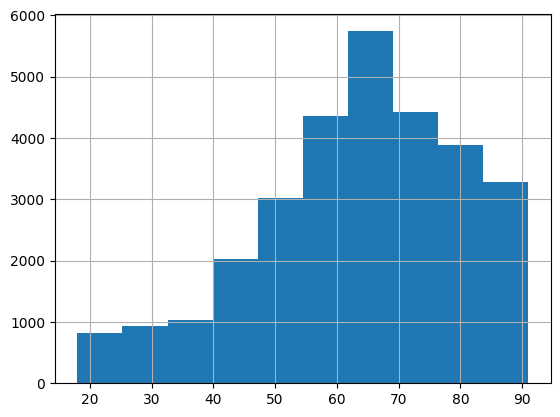

In [ ]:
final['Age'].hist()

In [ ]:
final_data['insurance'].value_counts()

insurance
Other       13969
Medicare    13359
Medicaid     2178
Name: count, dtype: int64

In [ ]:
final_data['gender'].value_counts()


gender
M    16785
F    12721
Name: count, dtype: int64

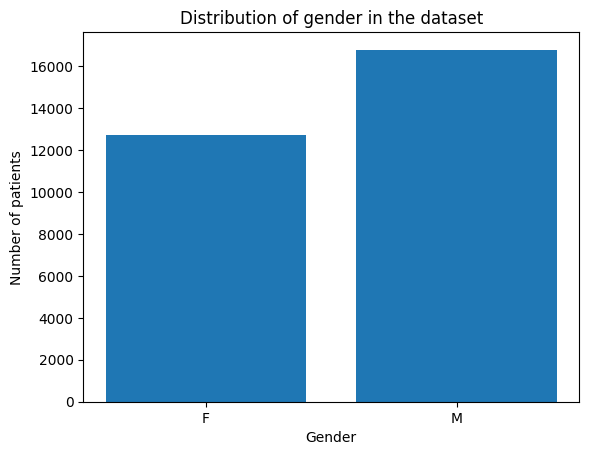

In [ ]:
gender_categories = final_data['gender'].unique()
gender_counts = final_data['gender'].value_counts().sort_values(ascending=True)  # Sort descending to ensure "M" comes first

plt.bar(gender_categories, gender_counts)
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.title('Distribution of gender in the dataset')
plt.show()

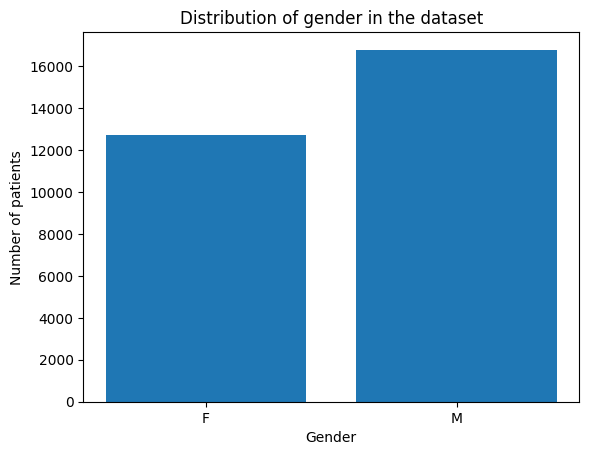

In [ ]:
# Gender distribution
plt.bar( final_data['gender'].unique(),final_data['gender'].value_counts().sort_values(ascending=True) )
plt.xlabel('Gender')
plt.ylabel('Number of patients')
plt.title('Distribution of gender in the dataset')
plt.show()


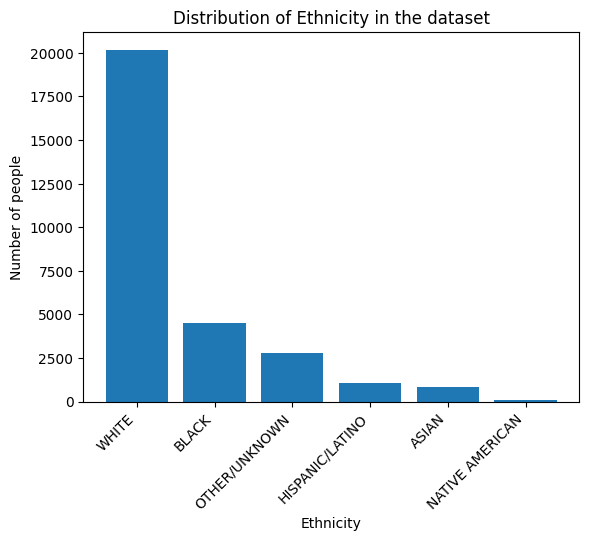

In [ ]:
# Ethnicity distribution
plt.bar(final_data['ethnicity'].unique(), final_data['ethnicity'].value_counts())
plt.xlabel('Ethnicity')
plt.ylabel('Number of people')
plt.title('Distribution of Ethnicity in the dataset')
plt.xticks(rotation=45, ha='right')
plt.show()

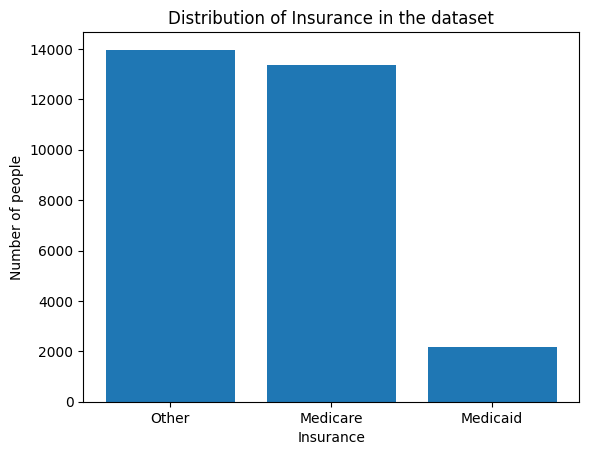

In [ ]:
#insurance
plt.bar(final_data['insurance'].unique(), final_data['insurance'].value_counts())
plt.xlabel('Insurance')
plt.ylabel('Number of patients')
plt.title('Distribution of Insurance in the dataset')
plt.show()

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'label'}>],
       [<Axes: title={'center': 'gender_M'}>,
        <Axes: title={'center': 'insurance_Medicare'}>],
       [<Axes: title={'center': 'insurance_Medicaid'}>,
        <Axes: title={'center': 'insurance_Other'}>]], dtype=object)

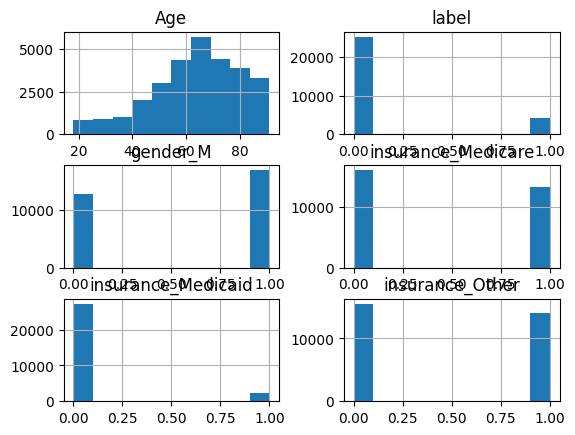

In [ ]:
final[['Age','label','gender_M', 'insurance_Medicare', 'insurance_Medicaid', 'insurance_Other']].hist()

<Axes: >

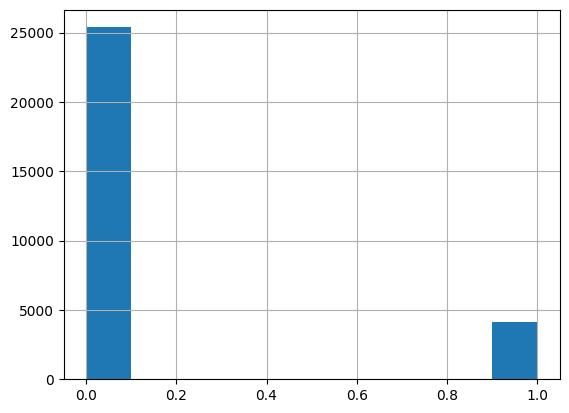

In [ ]:
final['label'].hist()

In [ ]:
final['label'] = final['label'].astype('category')

# Split  Hold-out validation

In [ ]:
X = final.drop(['label'], axis = 1)
y = final['label']

In [ ]:
# to determine which features are continuous vs categorical
data_types = X.dtypes
continuous_features = data_types[data_types != 'object'].index
categorical_features = data_types[data_types == 'object'].index

print("Continuous Features:")
print(continuous_features)

print("\nCategorical Features:")
print(categorical_features)

Continuous Features:
Index(['stay_id', 'CHART', 'CHART.1', 'CHART.10', 'CHART.100', 'CHART.101',
       'CHART.102', 'CHART.103', 'CHART.104', 'CHART.105',
       ...
       'gender_M', 'insurance_Medicaid', 'insurance_Medicare',
       'insurance_Other', 'ethnicity_ASIAN', 'ethnicity_BLACK',
       'ethnicity_HISPANIC/LATINO', 'ethnicity_NATIVE AMERICAN',
       'ethnicity_OTHER/UNKNOWN', 'ethnicity_WHITE'],
      dtype='object', length=2137)

Categorical Features:
Index([], dtype='object')


In [ ]:
#split for train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#split train for validation
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train , test_size=0.2, random_state=42)


print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(18883, 2137)
(4721, 2137)
(5902, 2137)
(18883,)
(4721,)
(5902,)


# Preprocess

In [ ]:
preprocess = make_column_transformer((StandardScaler(), continuous_features),
                                     (OneHotEncoder(handle_unknown='ignore'), categorical_features),remainder = "passthrough")

ML MODEL

# Random forest ML

In [ ]:
# RandomForest model
rf_model = RandomForestClassifier(n_estimators=100,
                                  random_state=42)

# Combine preprocessing and model into a pipeline
rf_pipeline = make_pipeline(preprocess, rf_model)

# Fit the RandomForest model on the entire training dataset
rf_pipeline.fit(X_train, y_train)

# Predictions on the validation set
y_valid_pred = rf_pipeline.predict(X_valid)

# Evaluate the accuracy on the validation set
accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {accuracy}')

Validation Accuracy: 0.8765092141495446


In [ ]:
# Predictions on the test set
y_test_pred = rf_pipeline.predict(X_test)

# Evaluate the accuracy on the test set
accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {accuracy}')

Test Accuracy: 0.8727549983056591


In [ ]:
#confusion Metrics
from sklearn.metrics import confusion_matrix

# Confusion matrix on the validation set
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
print("Confusion Matrix (Validation Set):\n", conf_matrix_valid)

# Confusion matrix on the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("\nConfusion Matrix (Test Set):\n", conf_matrix_test)

Confusion Matrix (Validation Set):
 [[4048   32]
 [ 551   90]]

Confusion Matrix (Test Set):
 [[5013   45]
 [ 706  138]]


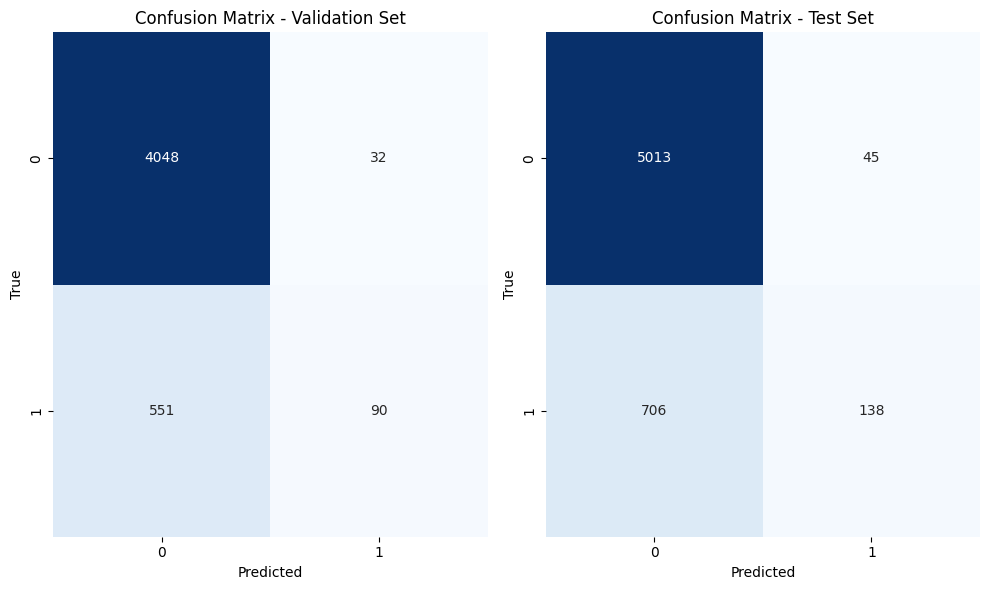

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion matrix on the validation set
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)

# Confusion matrix on the test set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Plot confusion matrix for the validation set
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
sns.heatmap(conf_matrix_valid, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Validation Set')
plt.xlabel('Predicted')
plt.ylabel('True')

# Plot confusion matrix for the test set
plt.subplot(1, 2, 2)
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted')
plt.ylabel('True')

plt.tight_layout()
plt.show()


In [ ]:
# Classification report on the test set
class_report_test = classification_report(y_test, y_test_pred)
print("\nClassification Report (Test Set):\n", class_report_test)


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.88      0.99      0.93      5058
           1       0.75      0.16      0.27       844

    accuracy                           0.87      5902
   macro avg       0.82      0.58      0.60      5902
weighted avg       0.86      0.87      0.84      5902



# XGboost

In [ ]:
from xgboost import XGBClassifier
# Create XGBoost classifier
xgb_model = XGBClassifier()

In [ ]:
# Create the pipeline
pipeline = make_pipeline(preprocess, xgb_model)

# Fit the model on the training data
pipeline.fit(X_train, y_train)

# Predictions on the validation set
y_valid_pred = pipeline.predict(X_valid)

# Evaluate the accuracy on the validation set
accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {accuracy}')

Validation Accuracy: 0.8843465367506884


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Predictions on the validation set
y_valid_pred = pipeline.predict(X_valid)

# Classification Report on Validation Set
print("Classification Report (Validation Set):\n", classification_report(y_valid, y_valid_pred))

# Confusion Matrix on Validation Set
conf_matrix_valid = confusion_matrix(y_valid, y_valid_pred)
print("Confusion Matrix (Validation Set):\n", conf_matrix_valid)


Classification Report (Validation Set):
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      4080
           1       0.63      0.36      0.46       641

    accuracy                           0.88      4721
   macro avg       0.77      0.66      0.70      4721
weighted avg       0.87      0.88      0.87      4721

Confusion Matrix (Validation Set):
 [[3944  136]
 [ 410  231]]


In [ ]:
# to improve XGboost ML performance  applied gridsearchCV, hyperparameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

# Define parameter grid
param_grid = {
    'xgbclassifier__learning_rate': [0.01, 0.1, 0.2],
    'xgbclassifier__max_depth': [3, 5, 7],
    'xgbclassifier__n_estimators': [50, 100, 200],
    # Add other parameters to tune
}

# Create GridSearchCV with ROC-AUC as the scoring metric
roc_auc_scorer = make_scorer(roc_auc_score)
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring=roc_auc_scorer, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Print best parameters
print("Best Parameters:", best_params)


Best Parameters: {'xgbclassifier__learning_rate': 0.2, 'xgbclassifier__max_depth': 3, 'xgbclassifier__n_estimators': 200}


In [ ]:
# Create the final XGBoost model with the best parameters
best_xgb_model = XGBClassifier(
    learning_rate=0.2,
    max_depth=3,
    n_estimators=200,
)
# Create the final pipeline
final_pipeline = make_pipeline(preprocess, best_xgb_model)
# Fit the final model on the entire training dataset
final_pipeline.fit(X_train, y_train)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  Index(['stay_id', 'CHART', 'CHART.1', 'CHART.10', 'CHART.100', 'CHART.101',
       'CHART.102', 'CHART.103', 'CHART.104', 'CHART.105',
       ...
       'gender_M', 'insurance_Medicaid', 'insurance_Medicare',
       'insurance_Other', 'ethnicity_ASIAN', 'ethnicity_B...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

In [ ]:
# Predictions on the test set
y_test_pred = final_pipeline.predict(X_test)

# Classification Report on Test Set
print("Classification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Confusion Matrix on Test Set
conf_matrix_test = confusion_matrix(y_test, y_test_pred)
print("Confusion Matrix (Test Set):\n", conf_matrix_test)


Classification Report (Test Set):
               precision    recall  f1-score   support

           0       0.90      0.97      0.94      5058
           1       0.67      0.38      0.49       844

    accuracy                           0.88      5902
   macro avg       0.79      0.67      0.71      5902
weighted avg       0.87      0.88      0.87      5902

Confusion Matrix (Test Set):
 [[4901  157]
 [ 523  321]]


In [ ]:
# Create the final XGBoost model with the best parameters
best_xgb_model = XGBClassifier(
    learning_rate=0.2,
    max_depth=3,
    n_estimators=200,

)

# Create the final pipeline
final_pipeline = make_pipeline(preprocess, best_xgb_model)

# Fit the final model on the entire training dataset
final_pipeline.fit(X_train, y_train)


# Predictions on the validation set
y_valid_pred = final_pipeline.predict(X_valid)

# Evaluate the accuracy on the validation set
best_accuracy = accuracy_score(y_valid, y_valid_pred)
print(f'Validation Accuracy: {best_accuracy}')

Validation Accuracy: 0.888794746875662


In [ ]:
# Predictions on the test set
y_test_pred = final_pipeline.predict(X_test)

# Evaluate the accuracy on the test set
best_accuracy = accuracy_score(y_test, y_test_pred)
print(f'Test Accuracy: {best_accuracy}')

Test Accuracy: 0.8847848187055235


In [ ]:
# considering class imbalance inthe dataset , attempted to use scale_pos_weight parameter ( scale_pos_weight=(len(y_train) - sum(y_train)) / sum(y_train))- it over fitted and decreased accuracy to 0.844

# Top 50 Feature Importance

In [ ]:
# Get the OneHotEncoder from the pipeline
onehotencoder = preprocess.named_transformers_['onehotencoder']

# Ensure the OneHotEncoder is fitted
onehotencoder.fit(X_train[categorical_features])

# Get feature importances
feature_importances = best_xgb_model.feature_importances_

# Get the corresponding feature names
categorical_features_names = onehotencoder.get_feature_names_out(X_train.columns[categorical_features])
feature_names = list(categorical_features_names) + list(X_train.columns.drop(categorical_features))

# Create a DataFrame to store feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(50)

# Print the top 100 features
#print("Top 100 Important Features:\n", top_features)


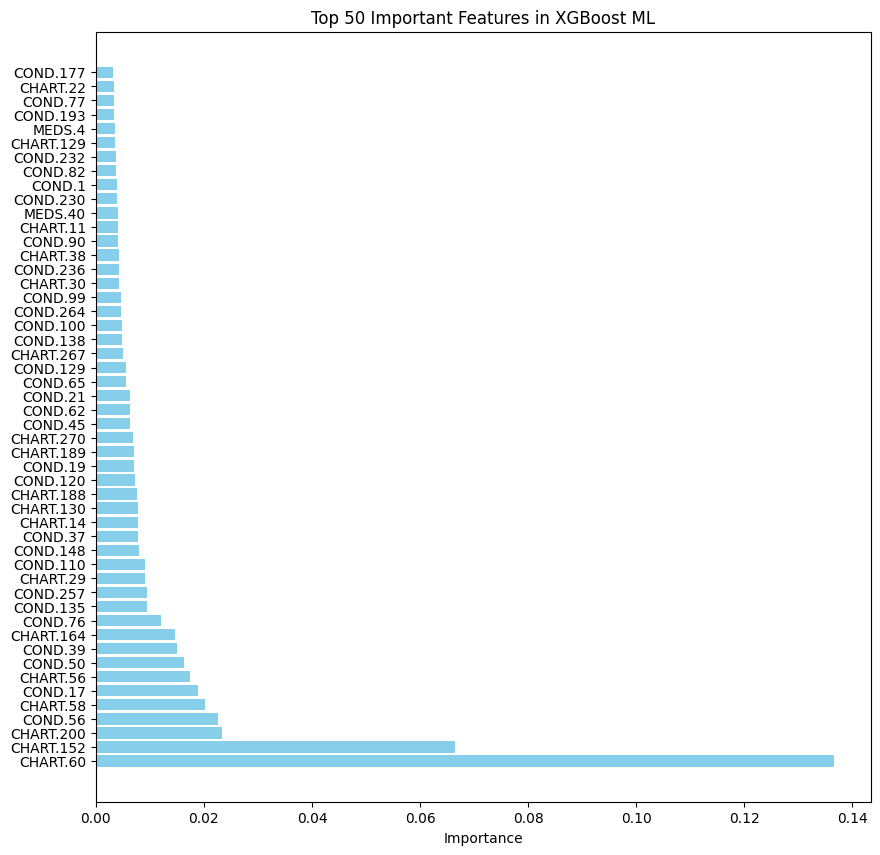

In [ ]:
import matplotlib.pyplot as plt

# Plot the top features
plt.figure(figsize=(10, 10))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Top 50 Important Features in XGBoost ML')
plt.show()


ROC_AUC

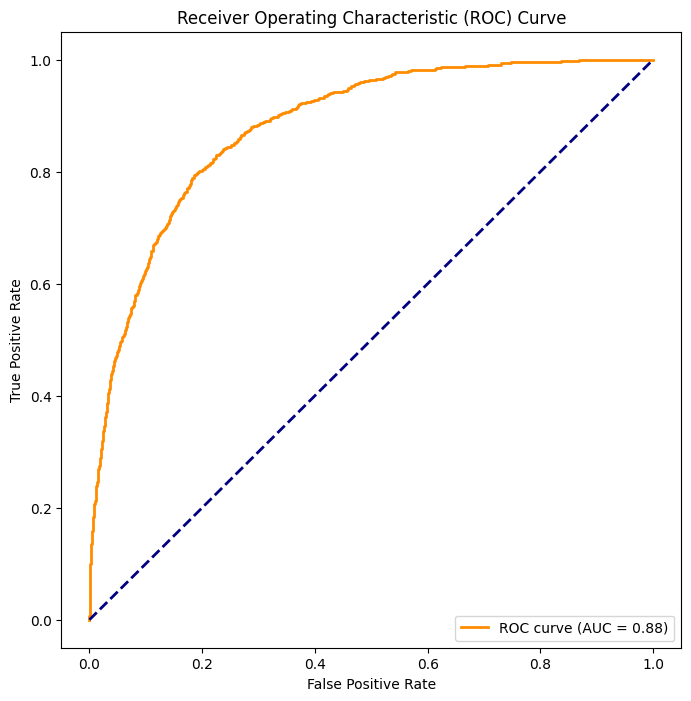

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for positive class
y_prob = final_pipeline.predict_proba(X_test)[:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# DIMENSION REDUCTION

#1. PCA

In [ ]:
# inorder to reduce dimension , we applied PCA- but the performance is decreased

Validation Accuracy with PCA: 0.8769328532090659
Classification Report (Validation Set) with PCA:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      4080
           1       0.59      0.29      0.39       641

    accuracy                           0.88      4721
   macro avg       0.75      0.63      0.66      4721
weighted avg       0.86      0.88      0.86      4721

Confusion Matrix (Validation Set) with PCA:
 [[3952  128]
 [ 453  188]]


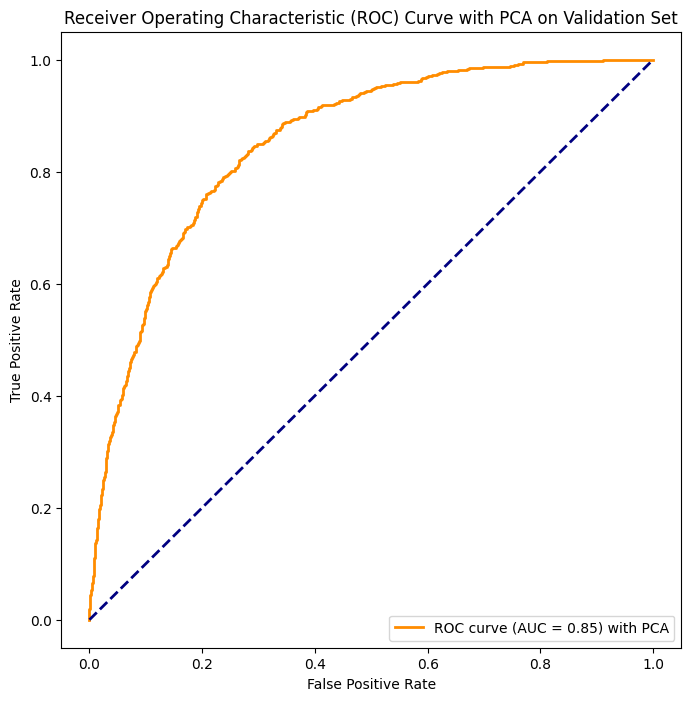

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Create a pipeline with PCA, StandardScaler, and XGBoost
pipeline_pca = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.95),  # Adjust the explained variance threshold as needed
    best_xgb_model
)

# Fit the model on the training data
pipeline_pca.fit(X_train, y_train)

# Predictions on the validation set
y_valid_pred_pca = pipeline_pca.predict(X_valid)

# Evaluate the model on the validation set
accuracy_valid_pca = accuracy_score(y_valid, y_valid_pred_pca)
print(f'Validation Accuracy with PCA: {accuracy_valid_pca}')

# Classification Report on Validation Set
print("Classification Report (Validation Set) with PCA:\n", classification_report(y_valid, y_valid_pred_pca))

# Confusion Matrix on Validation Set
conf_matrix_valid_pca = confusion_matrix(y_valid, y_valid_pred_pca)
print("Confusion Matrix (Validation Set) with PCA:\n", conf_matrix_valid_pca)

# Plot ROC curve with PCA on the validation set
y_prob_valid_pca = pipeline_pca.predict_proba(X_valid)[:, 1]
fpr_valid_pca, tpr_valid_pca, thresholds_valid_pca = roc_curve(y_valid, y_prob_valid_pca)
roc_auc_valid_pca = auc(fpr_valid_pca, tpr_valid_pca)

plt.figure(figsize=(8, 8))
plt.plot(fpr_valid_pca, tpr_valid_pca, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_valid_pca:.2f}) with PCA')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with PCA on Validation Set')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# Extract the top 10 principal components
pca_model = pipeline_pca.named_steps['pca']
top_10_components = pca_model.components_[:10, :]

# Display the top 10 principal components
print("Top 10 Principal Components:")
print(top_10_components)

Top 10 Principal Components:
[[ 2.02155512e-03  6.52227060e-04 -3.51677127e-03 ... -2.17039322e-04
   2.66253271e-02 -6.55953634e-03]
 [ 4.16134848e-04 -1.21380617e-03  4.59107789e-05 ... -1.83713337e-04
   3.71606446e-03 -2.65433999e-03]
 [-4.85312491e-03  3.59161321e-02  5.69174691e-03 ...  5.86822055e-03
   9.54675991e-03 -1.85030762e-02]
 ...
 [-6.68174302e-04  3.94165412e-02  2.50028321e-03 ...  3.85027405e-03
   2.69458135e-02 -1.89926526e-02]
 [-1.18494115e-03  1.57057494e-02 -1.57062106e-04 ... -9.97501704e-04
  -1.84566659e-02  1.49103016e-02]
 [-1.31982422e-03  3.05914871e-02  1.52269926e-03 ... -1.70968727e-03
  -2.66998343e-02  1.89081443e-02]]


Number of Components Retained: 1456
Validation Accuracy with PCA: 0.8769328532090659
Classification Report (Validation Set) with PCA:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      4080
           1       0.59      0.29      0.39       641

    accuracy                           0.88      4721
   macro avg       0.75      0.63      0.66      4721
weighted avg       0.86      0.88      0.86      4721

Confusion Matrix (Validation Set) with PCA:
 [[3952  128]
 [ 453  188]]


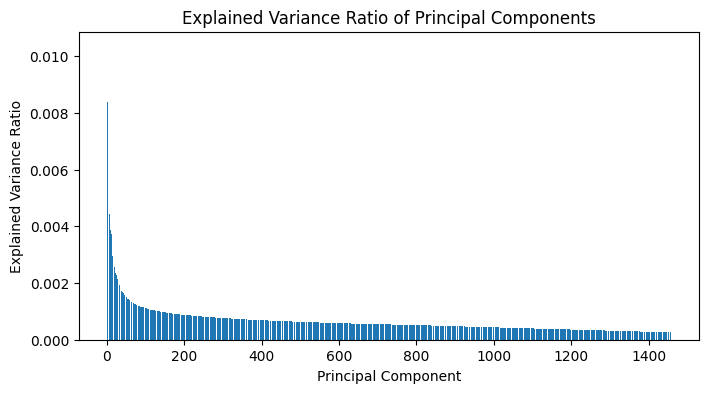

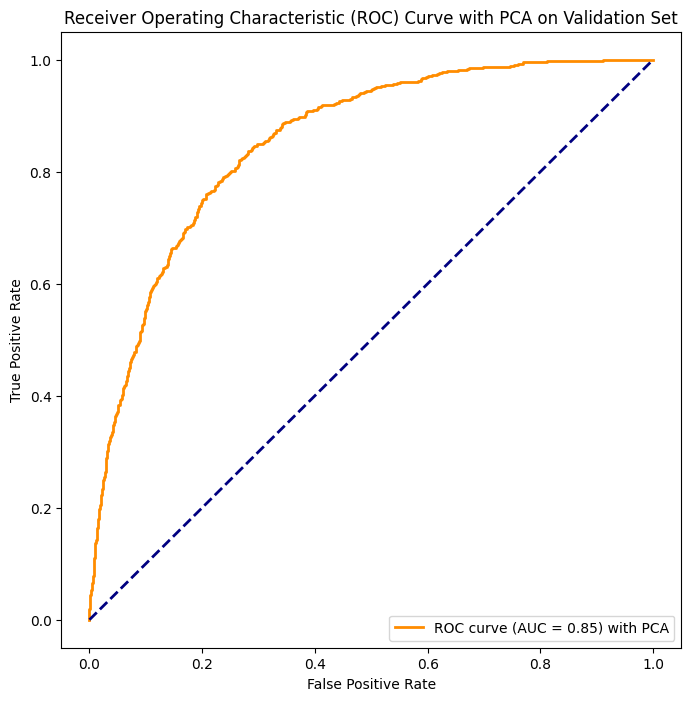

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# We have already defined and trained your XGBoost model (best_xgb_model)

# Create a pipeline with PCA, StandardScaler, and XGBoost
pipeline_pca = make_pipeline(
    StandardScaler(),
    PCA(n_components=0.95),  # Adjust the explained variance threshold as needed
    best_xgb_model
)
# Fit the model on the training data
pipeline_pca.fit(X_train, y_train)
# Access the number of components retained
num_components_retained = pipeline_pca.named_steps['pca'].n_components_
print(f'Number of Components Retained: {num_components_retained}')
# Predictions on the validation set
y_valid_pred_pca = pipeline_pca.predict(X_valid)
# Evaluate the model on the validation set
accuracy_valid_pca = accuracy_score(y_valid, y_valid_pred_pca)
print(f'Validation Accuracy with PCA: {accuracy_valid_pca}')
# Classification Report on Validation Set
print("Classification Report (Validation Set) with PCA:\n",
      classification_report(y_valid, y_valid_pred_pca))
# Confusion Matrix on Validation Set
conf_matrix_valid_pca = confusion_matrix(y_valid, y_valid_pred_pca)
print("Confusion Matrix (Validation Set) with PCA:\n",
      conf_matrix_valid_pca)
# Plot ROC curve with PCA on the validation set
y_prob_valid_pca = pipeline_pca.predict_proba(X_valid)[:, 1]
fpr_valid_pca, tpr_valid_pca, thresholds_valid_pca = roc_curve(y_valid, y_prob_valid_pca)
roc_auc_valid_pca = auc(fpr_valid_pca, tpr_valid_pca)
# Plot the PCA components
pca_components = pipeline_pca.named_steps['pca']
plt.figure(figsize=(8, 4))
plt.bar(range(1, len(pca_components.explained_variance_ratio_) + 1), pca_components.explained_variance_ratio_)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio of Principal Components')
plt.show()
# Plot ROC curve with PCA on the validation set
plt.figure(figsize=(8, 8))
plt.plot(fpr_valid_pca, tpr_valid_pca, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_valid_pca:.2f}) with PCA')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve with PCA on Validation Set')
plt.legend(loc='lower right')
plt.show()


#2.  t-Distributed Stochastic Neighbor Embedding (t-SNE)

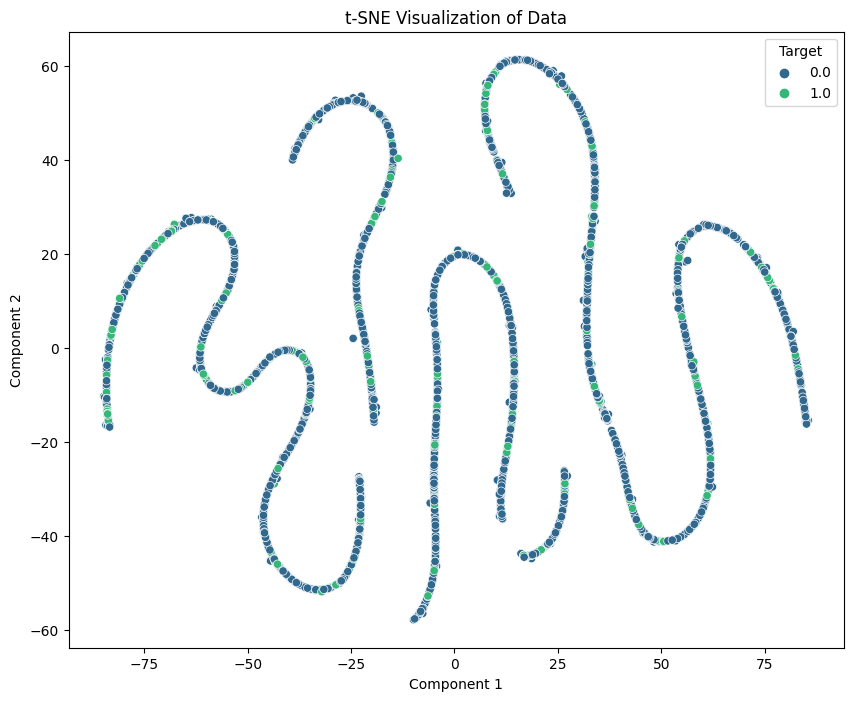

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns

# Transform the data using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_train)

# Concatenate the t-SNE components with the target variable for visualization
tsne_df = pd.DataFrame(data=np.c_[X_tsne, y_train], columns=['Component 1', 'Component 2', 'Target'])

# Plot t-SNE visualization
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Component 1', y='Component 2', hue='Target', data=tsne_df, palette='viridis')
plt.title('t-SNE Visualization of Data')
plt.show()


In [ ]:
#3D TSNE

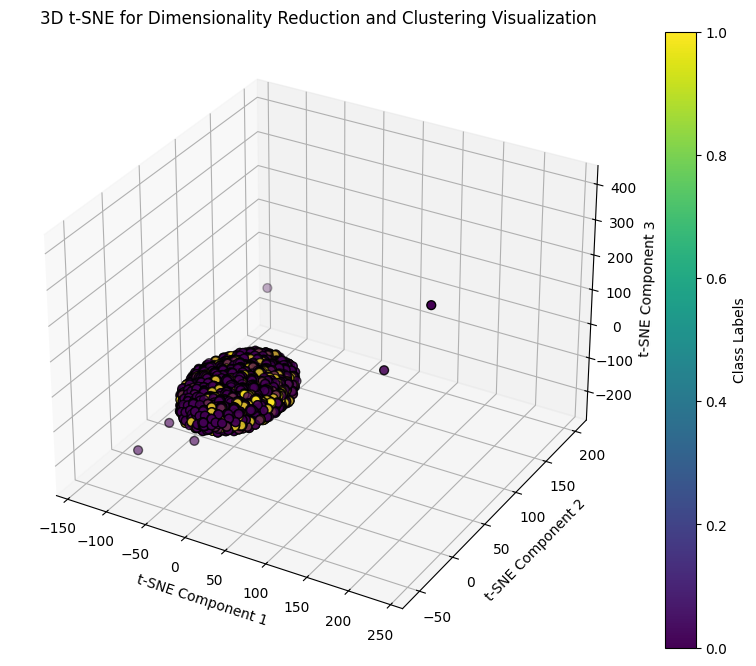

In [ ]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Importing the 3D plotting toolkit

# Assuming X_train is your training data
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=3, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

# Plot the reduced-dimensional data in 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], X_train_tsne[:, 2], c=y_train, cmap='viridis', edgecolor='k', s=40)
ax.set_xlabel('t-SNE Component 1')
ax.set_ylabel('t-SNE Component 2')
ax.set_zlabel('t-SNE Component 3')
ax.set_title('3D t-SNE for Dimensionality Reduction and Clustering Visualization')
fig.colorbar(scatter, ax=ax, label='Class Labels')
plt.show()


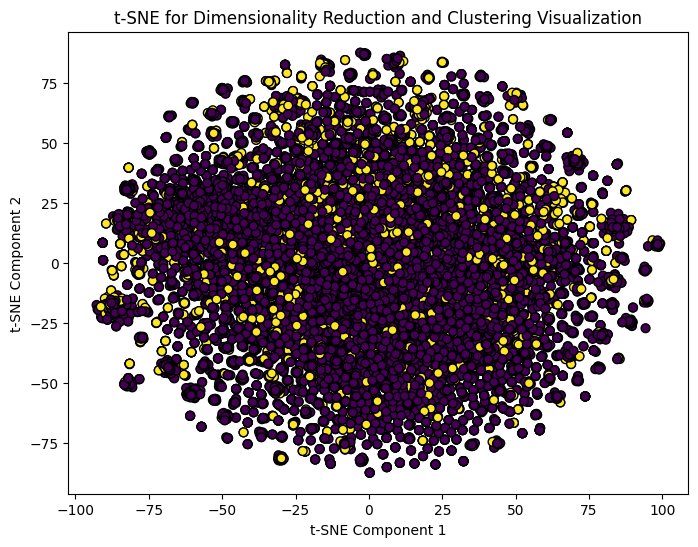

In [ ]:
#2D tsne
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Assuming X_train is your training data
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Use t-SNE for dimensionality reduction
tsne = TSNE(n_components=2, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)

# Plot the reduced-dimensional data with class labels
plt.figure(figsize=(8, 6))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=40)
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE for Dimensionality Reduction and Clustering Visualization')
plt.show()


#3. feature agglomeration - hierarchical clustering technique

In [ ]:
from sklearn.cluster import FeatureAgglomeration
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



# Create a pipeline with Feature Agglomeration, StandardScaler, and XGBoost
pipeline_agglomeration = make_pipeline(
    FeatureAgglomeration(n_clusters=50),  # Adjust the number of clusters as needed
    StandardScaler(),
    XGBClassifier(
        learning_rate=0.2,
        max_depth=3,
        n_estimators=200,

    )
)

# Fit the model on the training data
pipeline_agglomeration.fit(X_train, y_train)

# Predictions on the test set
y_valid_pred_agglomeration = pipeline_agglomeration.predict(X_valid)

# Evaluate the model
print("Classification Report (Validation Set) with Feature Agglomeration:\n", classification_report(y_valid, y_valid_pred_agglomeration))
print("Confusion Matrix (Validation Set) with Feature Agglomeration:\n", confusion_matrix(y_valid, y_valid_pred_agglomeration))


Classification Report (Validation Set) with Feature Agglomeration:
               precision    recall  f1-score   support

           0       0.88      0.97      0.92      4080
           1       0.46      0.15      0.22       641

    accuracy                           0.86      4721
   macro avg       0.67      0.56      0.57      4721
weighted avg       0.82      0.86      0.83      4721

Confusion Matrix (Validation Set) with Feature Agglomeration:
 [[3970  110]
 [ 548   93]]


# Adding Explainable AI

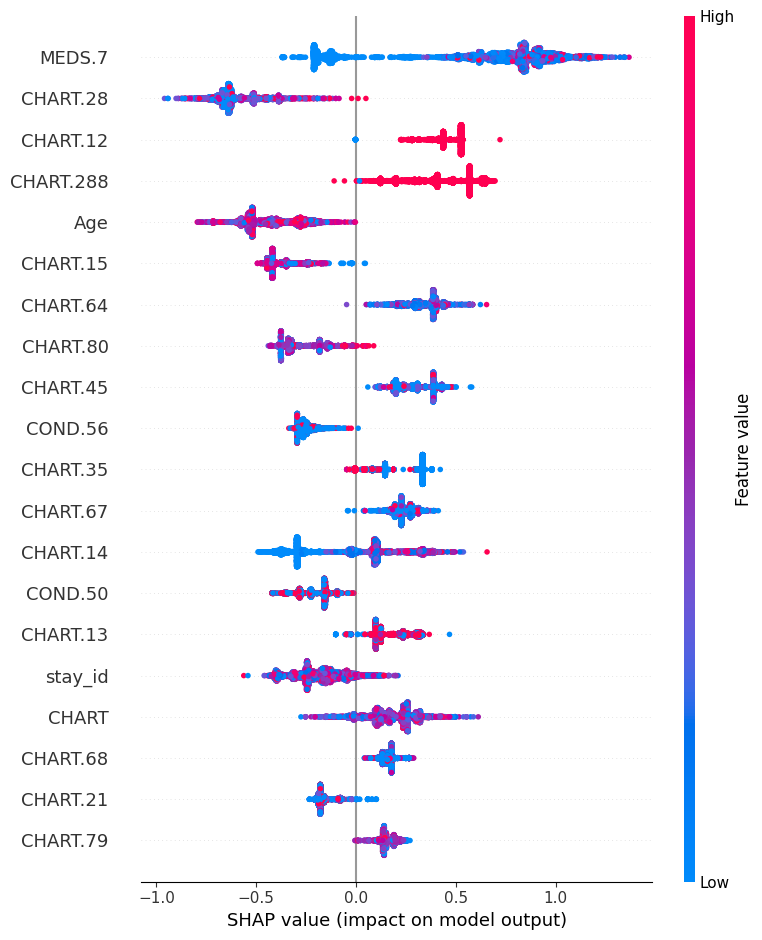

In [ ]:
#SHAP (SHapley Additive exPlanations):
#!pip install shap
import shap

# xgb_model is our trained XGBoost model and X_test is your test data
explainer = shap.Explainer(best_xgb_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)


In [ ]:
#2. LIME ( Local Interpretable Model-Agonistic Explanations)

In [ ]:
#!pip install lime

In [ ]:
from lime import lime_tabular

# Assuming xgb_model is your trained XGBoost model and X_test is your test data
explainer = lime_tabular.LimeTabularExplainer(X_train.values, feature_names=X_train.columns, mode='classification')
explanation = explainer.explain_instance(X_test.iloc[0], best_xgb_model.predict_proba)
explanation.show_in_notebook()
